### This is a program to predict points per team in NFL games.  The data is from:
 https://www.pro-football-reference.com/
 https://sonnymoorepowerratings.com/nfl-foot.htm
 https://www.nflweather.com/en/
 https://www.footballoutsiders.com/    

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
# read the training data
train_data = pd.read_csv('~/completedgames.csv')

In [3]:
# select feature variables to be scaled
features = train_data.iloc[:,11:]

max_abs_scaler = preprocessing.MaxAbsScaler()

#fit and transform and save as X 
X = max_abs_scaler.fit_transform(features)


In [4]:
# save result variable as y
y = train_data['Spread']

In [5]:
# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.5, random_state=42)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((123, 93), (123, 93), (123,), (123,))

In [6]:
# create an object of the LinearRegression Model
model_LR = linear_model.ElasticNet()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train_LR = model_LR.predict(train_x)
predict_test_LR  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_LR)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_LR)**(0.5))

RMSE on train data:  11.120188482920735
RMSE on test data:  12.761134356198479


In [7]:
score = model_LR.score(test_x, test_y)
R = mean_squared_error(test_y, predict_test_LR)**(0.5)

score


0.03187589561730664

In [10]:
# create a list of alphas
alphas = [vala/100 for vala in range(10, 100,5)]
# create a list of ratios
ratios = [valb/100 for valb in range(0, 100)]
accvar = 0


for alpha in alphas:
    for ratio in ratios:

        # instantiate the classifier
        model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, max_iter=1000000)

        # fit the classifier to the training data
        model_LR.fit(train_x, train_y)

        # predict with the classifier using the .predict() function
        pred_y = model_LR.predict(test_x)

        # view the model accuracy with the accuracy_score() function, Accuracy: 16.0% | penalty = 0.7, C = 0.1
        accuracy = model_LR.score(test_x, test_y)
        accuracy_rd = round(accuracy*100,1)
        if accuracy_rd > accvar:
            accvar = accuracy_rd
            avar = alpha
            rvar = ratio

        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | alpha = {alpha}, ratio = {ratio}')

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6591.322444252205, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 14.8% | alpha = 0.1, ratio = 0.0
Accuracy: 14.8% | alpha = 0.1, ratio = 0.01
Accuracy: 14.8% | alpha = 0.1, ratio = 0.02
Accuracy: 14.8% | alpha = 0.1, ratio = 0.03
Accuracy: 14.8% | alpha = 0.1, ratio = 0.04
Accuracy: 14.8% | alpha = 0.1, ratio = 0.05
Accuracy: 14.8% | alpha = 0.1, ratio = 0.06
Accuracy: 14.8% | alpha = 0.1, ratio = 0.07
Accuracy: 14.9% | alpha = 0.1, ratio = 0.08
Accuracy: 14.9% | alpha = 0.1, ratio = 0.09
Accuracy: 14.9% | alpha = 0.1, ratio = 0.1
Accuracy: 14.9% | alpha = 0.1, ratio = 0.11
Accuracy: 14.9% | alpha = 0.1, ratio = 0.12
Accuracy: 14.9% | alpha = 0.1, ratio = 0.13
Accuracy: 14.9% | alpha = 0.1, ratio = 0.14
Accuracy: 14.9% | alpha = 0.1, ratio = 0.15
Accuracy: 15.0% | alpha = 0.1, ratio = 0.16
Accuracy: 15.0% | alpha = 0.1, ratio = 0.17
Accuracy: 15.0% | alpha = 0.1, ratio = 0.18
Accuracy: 15.0% | alpha = 0.1, ratio = 0.19
Accuracy: 15.0% | alpha = 0.1, ratio = 0.2
Accuracy: 15.0% | alpha = 0.1, ratio = 0.21
Accuracy: 15.0% | alpha = 0.1, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6775.9552449153225, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 14.4% | alpha = 0.15, ratio = 0.0
Accuracy: 14.4% | alpha = 0.15, ratio = 0.01
Accuracy: 14.4% | alpha = 0.15, ratio = 0.02
Accuracy: 14.4% | alpha = 0.15, ratio = 0.03
Accuracy: 14.4% | alpha = 0.15, ratio = 0.04
Accuracy: 14.4% | alpha = 0.15, ratio = 0.05
Accuracy: 14.4% | alpha = 0.15, ratio = 0.06
Accuracy: 14.4% | alpha = 0.15, ratio = 0.07
Accuracy: 14.4% | alpha = 0.15, ratio = 0.08
Accuracy: 14.5% | alpha = 0.15, ratio = 0.09
Accuracy: 14.5% | alpha = 0.15, ratio = 0.1
Accuracy: 14.5% | alpha = 0.15, ratio = 0.11
Accuracy: 14.5% | alpha = 0.15, ratio = 0.12
Accuracy: 14.5% | alpha = 0.15, ratio = 0.13
Accuracy: 14.5% | alpha = 0.15, ratio = 0.14
Accuracy: 14.5% | alpha = 0.15, ratio = 0.15
Accuracy: 14.5% | alpha = 0.15, ratio = 0.16
Accuracy: 14.5% | alpha = 0.15, ratio = 0.17
Accuracy: 14.5% | alpha = 0.15, ratio = 0.18
Accuracy: 14.5% | alpha = 0.15, ratio = 0.19
Accuracy: 14.5% | alpha = 0.15, ratio = 0.2
Accuracy: 14.5% | alpha = 0.15, ratio = 0.21
Accuracy: 14.

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6909.180709351391, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 13.8% | alpha = 0.2, ratio = 0.0
Accuracy: 13.8% | alpha = 0.2, ratio = 0.01
Accuracy: 13.8% | alpha = 0.2, ratio = 0.02
Accuracy: 13.8% | alpha = 0.2, ratio = 0.03
Accuracy: 13.8% | alpha = 0.2, ratio = 0.04
Accuracy: 13.8% | alpha = 0.2, ratio = 0.05
Accuracy: 13.8% | alpha = 0.2, ratio = 0.06
Accuracy: 13.8% | alpha = 0.2, ratio = 0.07
Accuracy: 13.8% | alpha = 0.2, ratio = 0.08
Accuracy: 13.8% | alpha = 0.2, ratio = 0.09
Accuracy: 13.8% | alpha = 0.2, ratio = 0.1
Accuracy: 13.8% | alpha = 0.2, ratio = 0.11
Accuracy: 13.8% | alpha = 0.2, ratio = 0.12
Accuracy: 13.8% | alpha = 0.2, ratio = 0.13
Accuracy: 13.8% | alpha = 0.2, ratio = 0.14
Accuracy: 13.8% | alpha = 0.2, ratio = 0.15
Accuracy: 13.8% | alpha = 0.2, ratio = 0.16
Accuracy: 13.7% | alpha = 0.2, ratio = 0.17
Accuracy: 13.7% | alpha = 0.2, ratio = 0.18
Accuracy: 13.7% | alpha = 0.2, ratio = 0.19
Accuracy: 13.7% | alpha = 0.2, ratio = 0.2
Accuracy: 13.8% | alpha = 0.2, ratio = 0.21
Accuracy: 13.8% | alpha = 0.2, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7011.640706795446, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 13.1% | alpha = 0.25, ratio = 0.0
Accuracy: 13.1% | alpha = 0.25, ratio = 0.01
Accuracy: 13.1% | alpha = 0.25, ratio = 0.02
Accuracy: 13.1% | alpha = 0.25, ratio = 0.03
Accuracy: 13.1% | alpha = 0.25, ratio = 0.04
Accuracy: 13.0% | alpha = 0.25, ratio = 0.05
Accuracy: 13.0% | alpha = 0.25, ratio = 0.06
Accuracy: 13.0% | alpha = 0.25, ratio = 0.07
Accuracy: 13.0% | alpha = 0.25, ratio = 0.08
Accuracy: 13.0% | alpha = 0.25, ratio = 0.09
Accuracy: 13.0% | alpha = 0.25, ratio = 0.1
Accuracy: 13.0% | alpha = 0.25, ratio = 0.11
Accuracy: 13.0% | alpha = 0.25, ratio = 0.12
Accuracy: 13.0% | alpha = 0.25, ratio = 0.13
Accuracy: 13.0% | alpha = 0.25, ratio = 0.14
Accuracy: 12.9% | alpha = 0.25, ratio = 0.15
Accuracy: 12.9% | alpha = 0.25, ratio = 0.16
Accuracy: 12.9% | alpha = 0.25, ratio = 0.17
Accuracy: 12.9% | alpha = 0.25, ratio = 0.18
Accuracy: 12.9% | alpha = 0.25, ratio = 0.19
Accuracy: 12.9% | alpha = 0.25, ratio = 0.2
Accuracy: 12.9% | alpha = 0.25, ratio = 0.21
Accuracy: 12.

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7093.684898776468, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 12.4% | alpha = 0.3, ratio = 0.0
Accuracy: 12.4% | alpha = 0.3, ratio = 0.01
Accuracy: 12.4% | alpha = 0.3, ratio = 0.02
Accuracy: 12.4% | alpha = 0.3, ratio = 0.03
Accuracy: 12.4% | alpha = 0.3, ratio = 0.04
Accuracy: 12.3% | alpha = 0.3, ratio = 0.05
Accuracy: 12.3% | alpha = 0.3, ratio = 0.06
Accuracy: 12.3% | alpha = 0.3, ratio = 0.07
Accuracy: 12.3% | alpha = 0.3, ratio = 0.08
Accuracy: 12.3% | alpha = 0.3, ratio = 0.09
Accuracy: 12.2% | alpha = 0.3, ratio = 0.1
Accuracy: 12.2% | alpha = 0.3, ratio = 0.11
Accuracy: 12.2% | alpha = 0.3, ratio = 0.12
Accuracy: 12.2% | alpha = 0.3, ratio = 0.13
Accuracy: 12.2% | alpha = 0.3, ratio = 0.14
Accuracy: 12.1% | alpha = 0.3, ratio = 0.15
Accuracy: 12.1% | alpha = 0.3, ratio = 0.16
Accuracy: 12.1% | alpha = 0.3, ratio = 0.17
Accuracy: 12.1% | alpha = 0.3, ratio = 0.18
Accuracy: 12.1% | alpha = 0.3, ratio = 0.19
Accuracy: 12.0% | alpha = 0.3, ratio = 0.2
Accuracy: 12.0% | alpha = 0.3, ratio = 0.21
Accuracy: 12.0% | alpha = 0.3, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7161.275362910674, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 11.8% | alpha = 0.35, ratio = 0.0
Accuracy: 11.8% | alpha = 0.35, ratio = 0.01
Accuracy: 11.8% | alpha = 0.35, ratio = 0.02
Accuracy: 11.7% | alpha = 0.35, ratio = 0.03
Accuracy: 11.7% | alpha = 0.35, ratio = 0.04
Accuracy: 11.7% | alpha = 0.35, ratio = 0.05
Accuracy: 11.6% | alpha = 0.35, ratio = 0.06
Accuracy: 11.6% | alpha = 0.35, ratio = 0.07
Accuracy: 11.6% | alpha = 0.35, ratio = 0.08
Accuracy: 11.6% | alpha = 0.35, ratio = 0.09
Accuracy: 11.5% | alpha = 0.35, ratio = 0.1
Accuracy: 11.5% | alpha = 0.35, ratio = 0.11
Accuracy: 11.5% | alpha = 0.35, ratio = 0.12
Accuracy: 11.4% | alpha = 0.35, ratio = 0.13
Accuracy: 11.4% | alpha = 0.35, ratio = 0.14
Accuracy: 11.4% | alpha = 0.35, ratio = 0.15
Accuracy: 11.3% | alpha = 0.35, ratio = 0.16
Accuracy: 11.3% | alpha = 0.35, ratio = 0.17
Accuracy: 11.3% | alpha = 0.35, ratio = 0.18
Accuracy: 11.3% | alpha = 0.35, ratio = 0.19
Accuracy: 11.2% | alpha = 0.35, ratio = 0.2
Accuracy: 11.2% | alpha = 0.35, ratio = 0.21
Accuracy: 11.

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7218.159927555397, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 11.2% | alpha = 0.4, ratio = 0.0
Accuracy: 11.2% | alpha = 0.4, ratio = 0.01
Accuracy: 11.2% | alpha = 0.4, ratio = 0.02
Accuracy: 11.1% | alpha = 0.4, ratio = 0.03
Accuracy: 11.1% | alpha = 0.4, ratio = 0.04
Accuracy: 11.0% | alpha = 0.4, ratio = 0.05
Accuracy: 11.0% | alpha = 0.4, ratio = 0.06
Accuracy: 11.0% | alpha = 0.4, ratio = 0.07
Accuracy: 10.9% | alpha = 0.4, ratio = 0.08
Accuracy: 10.9% | alpha = 0.4, ratio = 0.09
Accuracy: 10.9% | alpha = 0.4, ratio = 0.1
Accuracy: 10.8% | alpha = 0.4, ratio = 0.11
Accuracy: 10.8% | alpha = 0.4, ratio = 0.12
Accuracy: 10.7% | alpha = 0.4, ratio = 0.13
Accuracy: 10.7% | alpha = 0.4, ratio = 0.14
Accuracy: 10.7% | alpha = 0.4, ratio = 0.15
Accuracy: 10.6% | alpha = 0.4, ratio = 0.16
Accuracy: 10.6% | alpha = 0.4, ratio = 0.17
Accuracy: 10.6% | alpha = 0.4, ratio = 0.18
Accuracy: 10.5% | alpha = 0.4, ratio = 0.19
Accuracy: 10.5% | alpha = 0.4, ratio = 0.2
Accuracy: 10.4% | alpha = 0.4, ratio = 0.21
Accuracy: 10.4% | alpha = 0.4, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7266.8425835057205, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 10.7% | alpha = 0.45, ratio = 0.0
Accuracy: 10.7% | alpha = 0.45, ratio = 0.01
Accuracy: 10.6% | alpha = 0.45, ratio = 0.02
Accuracy: 10.6% | alpha = 0.45, ratio = 0.03
Accuracy: 10.5% | alpha = 0.45, ratio = 0.04
Accuracy: 10.5% | alpha = 0.45, ratio = 0.05
Accuracy: 10.4% | alpha = 0.45, ratio = 0.06
Accuracy: 10.4% | alpha = 0.45, ratio = 0.07
Accuracy: 10.3% | alpha = 0.45, ratio = 0.08
Accuracy: 10.3% | alpha = 0.45, ratio = 0.09
Accuracy: 10.2% | alpha = 0.45, ratio = 0.1
Accuracy: 10.2% | alpha = 0.45, ratio = 0.11
Accuracy: 10.1% | alpha = 0.45, ratio = 0.12
Accuracy: 10.1% | alpha = 0.45, ratio = 0.13
Accuracy: 10.0% | alpha = 0.45, ratio = 0.14
Accuracy: 10.0% | alpha = 0.45, ratio = 0.15
Accuracy: 10.0% | alpha = 0.45, ratio = 0.16
Accuracy: 9.9% | alpha = 0.45, ratio = 0.17
Accuracy: 9.9% | alpha = 0.45, ratio = 0.18
Accuracy: 9.8% | alpha = 0.45, ratio = 0.19
Accuracy: 9.8% | alpha = 0.45, ratio = 0.2
Accuracy: 9.8% | alpha = 0.45, ratio = 0.21
Accuracy: 9.7% | a

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7309.074037888721, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 10.2% | alpha = 0.5, ratio = 0.0
Accuracy: 10.2% | alpha = 0.5, ratio = 0.01
Accuracy: 10.1% | alpha = 0.5, ratio = 0.02
Accuracy: 10.1% | alpha = 0.5, ratio = 0.03
Accuracy: 10.0% | alpha = 0.5, ratio = 0.04
Accuracy: 9.9% | alpha = 0.5, ratio = 0.05
Accuracy: 9.9% | alpha = 0.5, ratio = 0.06
Accuracy: 9.8% | alpha = 0.5, ratio = 0.07
Accuracy: 9.8% | alpha = 0.5, ratio = 0.08
Accuracy: 9.7% | alpha = 0.5, ratio = 0.09
Accuracy: 9.7% | alpha = 0.5, ratio = 0.1
Accuracy: 9.6% | alpha = 0.5, ratio = 0.11
Accuracy: 9.6% | alpha = 0.5, ratio = 0.12
Accuracy: 9.5% | alpha = 0.5, ratio = 0.13
Accuracy: 9.5% | alpha = 0.5, ratio = 0.14
Accuracy: 9.4% | alpha = 0.5, ratio = 0.15
Accuracy: 9.4% | alpha = 0.5, ratio = 0.16
Accuracy: 9.3% | alpha = 0.5, ratio = 0.17
Accuracy: 9.3% | alpha = 0.5, ratio = 0.18
Accuracy: 9.2% | alpha = 0.5, ratio = 0.19
Accuracy: 9.2% | alpha = 0.5, ratio = 0.2
Accuracy: 9.1% | alpha = 0.5, ratio = 0.21
Accuracy: 9.1% | alpha = 0.5, ratio = 0.22
Accuracy:

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7346.12244059053, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 9.8% | alpha = 0.55, ratio = 0.0
Accuracy: 9.7% | alpha = 0.55, ratio = 0.01
Accuracy: 9.7% | alpha = 0.55, ratio = 0.02
Accuracy: 9.6% | alpha = 0.55, ratio = 0.03
Accuracy: 9.5% | alpha = 0.55, ratio = 0.04
Accuracy: 9.5% | alpha = 0.55, ratio = 0.05
Accuracy: 9.4% | alpha = 0.55, ratio = 0.06
Accuracy: 9.3% | alpha = 0.55, ratio = 0.07
Accuracy: 9.3% | alpha = 0.55, ratio = 0.08
Accuracy: 9.2% | alpha = 0.55, ratio = 0.09
Accuracy: 9.1% | alpha = 0.55, ratio = 0.1
Accuracy: 9.1% | alpha = 0.55, ratio = 0.11
Accuracy: 9.0% | alpha = 0.55, ratio = 0.12
Accuracy: 9.0% | alpha = 0.55, ratio = 0.13
Accuracy: 8.9% | alpha = 0.55, ratio = 0.14
Accuracy: 8.9% | alpha = 0.55, ratio = 0.15
Accuracy: 8.8% | alpha = 0.55, ratio = 0.16
Accuracy: 8.8% | alpha = 0.55, ratio = 0.17
Accuracy: 8.7% | alpha = 0.55, ratio = 0.18
Accuracy: 8.7% | alpha = 0.55, ratio = 0.19
Accuracy: 8.6% | alpha = 0.55, ratio = 0.2
Accuracy: 8.6% | alpha = 0.55, ratio = 0.21
Accuracy: 8.5% | alpha = 0.55, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7378.932964735229, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 9.4% | alpha = 0.6, ratio = 0.0
Accuracy: 9.3% | alpha = 0.6, ratio = 0.01
Accuracy: 9.2% | alpha = 0.6, ratio = 0.02
Accuracy: 9.2% | alpha = 0.6, ratio = 0.03
Accuracy: 9.1% | alpha = 0.6, ratio = 0.04
Accuracy: 9.0% | alpha = 0.6, ratio = 0.05
Accuracy: 8.9% | alpha = 0.6, ratio = 0.06
Accuracy: 8.9% | alpha = 0.6, ratio = 0.07
Accuracy: 8.8% | alpha = 0.6, ratio = 0.08
Accuracy: 8.7% | alpha = 0.6, ratio = 0.09
Accuracy: 8.7% | alpha = 0.6, ratio = 0.1
Accuracy: 8.6% | alpha = 0.6, ratio = 0.11
Accuracy: 8.5% | alpha = 0.6, ratio = 0.12
Accuracy: 8.5% | alpha = 0.6, ratio = 0.13
Accuracy: 8.4% | alpha = 0.6, ratio = 0.14
Accuracy: 8.4% | alpha = 0.6, ratio = 0.15
Accuracy: 8.3% | alpha = 0.6, ratio = 0.16
Accuracy: 8.2% | alpha = 0.6, ratio = 0.17
Accuracy: 8.2% | alpha = 0.6, ratio = 0.18
Accuracy: 8.1% | alpha = 0.6, ratio = 0.19
Accuracy: 8.1% | alpha = 0.6, ratio = 0.2
Accuracy: 8.0% | alpha = 0.6, ratio = 0.21
Accuracy: 8.0% | alpha = 0.6, ratio = 0.22
Accuracy: 7.9%

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7408.226846270808, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 9.0% | alpha = 0.65, ratio = 0.0
Accuracy: 8.9% | alpha = 0.65, ratio = 0.01
Accuracy: 8.8% | alpha = 0.65, ratio = 0.02
Accuracy: 8.8% | alpha = 0.65, ratio = 0.03
Accuracy: 8.7% | alpha = 0.65, ratio = 0.04
Accuracy: 8.6% | alpha = 0.65, ratio = 0.05
Accuracy: 8.5% | alpha = 0.65, ratio = 0.06
Accuracy: 8.4% | alpha = 0.65, ratio = 0.07
Accuracy: 8.4% | alpha = 0.65, ratio = 0.08
Accuracy: 8.3% | alpha = 0.65, ratio = 0.09
Accuracy: 8.2% | alpha = 0.65, ratio = 0.1
Accuracy: 8.1% | alpha = 0.65, ratio = 0.11
Accuracy: 8.1% | alpha = 0.65, ratio = 0.12
Accuracy: 8.0% | alpha = 0.65, ratio = 0.13
Accuracy: 8.0% | alpha = 0.65, ratio = 0.14
Accuracy: 7.9% | alpha = 0.65, ratio = 0.15
Accuracy: 7.8% | alpha = 0.65, ratio = 0.16
Accuracy: 7.8% | alpha = 0.65, ratio = 0.17
Accuracy: 7.7% | alpha = 0.65, ratio = 0.18
Accuracy: 7.6% | alpha = 0.65, ratio = 0.19
Accuracy: 7.6% | alpha = 0.65, ratio = 0.2
Accuracy: 7.5% | alpha = 0.65, ratio = 0.21
Accuracy: 7.4% | alpha = 0.65, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7434.565460265536, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 8.6% | alpha = 0.7, ratio = 0.0
Accuracy: 8.6% | alpha = 0.7, ratio = 0.01
Accuracy: 8.5% | alpha = 0.7, ratio = 0.02
Accuracy: 8.4% | alpha = 0.7, ratio = 0.03
Accuracy: 8.3% | alpha = 0.7, ratio = 0.04
Accuracy: 8.2% | alpha = 0.7, ratio = 0.05
Accuracy: 8.1% | alpha = 0.7, ratio = 0.06
Accuracy: 8.0% | alpha = 0.7, ratio = 0.07
Accuracy: 8.0% | alpha = 0.7, ratio = 0.08
Accuracy: 7.9% | alpha = 0.7, ratio = 0.09
Accuracy: 7.8% | alpha = 0.7, ratio = 0.1
Accuracy: 7.7% | alpha = 0.7, ratio = 0.11
Accuracy: 7.7% | alpha = 0.7, ratio = 0.12
Accuracy: 7.6% | alpha = 0.7, ratio = 0.13
Accuracy: 7.5% | alpha = 0.7, ratio = 0.14
Accuracy: 7.5% | alpha = 0.7, ratio = 0.15
Accuracy: 7.4% | alpha = 0.7, ratio = 0.16
Accuracy: 7.3% | alpha = 0.7, ratio = 0.17
Accuracy: 7.3% | alpha = 0.7, ratio = 0.18
Accuracy: 7.2% | alpha = 0.7, ratio = 0.19
Accuracy: 7.1% | alpha = 0.7, ratio = 0.2
Accuracy: 7.0% | alpha = 0.7, ratio = 0.21
Accuracy: 7.0% | alpha = 0.7, ratio = 0.22
Accuracy: 6.9%

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7458.393226486429, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 8.3% | alpha = 0.75, ratio = 0.0
Accuracy: 8.2% | alpha = 0.75, ratio = 0.01
Accuracy: 8.1% | alpha = 0.75, ratio = 0.02
Accuracy: 8.1% | alpha = 0.75, ratio = 0.03
Accuracy: 8.0% | alpha = 0.75, ratio = 0.04
Accuracy: 7.9% | alpha = 0.75, ratio = 0.05
Accuracy: 7.8% | alpha = 0.75, ratio = 0.06
Accuracy: 7.7% | alpha = 0.75, ratio = 0.07
Accuracy: 7.6% | alpha = 0.75, ratio = 0.08
Accuracy: 7.5% | alpha = 0.75, ratio = 0.09
Accuracy: 7.4% | alpha = 0.75, ratio = 0.1
Accuracy: 7.4% | alpha = 0.75, ratio = 0.11
Accuracy: 7.3% | alpha = 0.75, ratio = 0.12
Accuracy: 7.2% | alpha = 0.75, ratio = 0.13
Accuracy: 7.1% | alpha = 0.75, ratio = 0.14
Accuracy: 7.1% | alpha = 0.75, ratio = 0.15
Accuracy: 7.0% | alpha = 0.75, ratio = 0.16
Accuracy: 6.9% | alpha = 0.75, ratio = 0.17
Accuracy: 6.8% | alpha = 0.75, ratio = 0.18
Accuracy: 6.8% | alpha = 0.75, ratio = 0.19
Accuracy: 6.7% | alpha = 0.75, ratio = 0.2
Accuracy: 6.6% | alpha = 0.75, ratio = 0.21
Accuracy: 6.5% | alpha = 0.75, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7480.067183289618, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 8.0% | alpha = 0.8, ratio = 0.0
Accuracy: 7.9% | alpha = 0.8, ratio = 0.01
Accuracy: 7.8% | alpha = 0.8, ratio = 0.02
Accuracy: 7.7% | alpha = 0.8, ratio = 0.03
Accuracy: 7.6% | alpha = 0.8, ratio = 0.04
Accuracy: 7.5% | alpha = 0.8, ratio = 0.05
Accuracy: 7.4% | alpha = 0.8, ratio = 0.06
Accuracy: 7.3% | alpha = 0.8, ratio = 0.07
Accuracy: 7.3% | alpha = 0.8, ratio = 0.08
Accuracy: 7.2% | alpha = 0.8, ratio = 0.09
Accuracy: 7.1% | alpha = 0.8, ratio = 0.1
Accuracy: 7.0% | alpha = 0.8, ratio = 0.11
Accuracy: 6.9% | alpha = 0.8, ratio = 0.12
Accuracy: 6.9% | alpha = 0.8, ratio = 0.13
Accuracy: 6.8% | alpha = 0.8, ratio = 0.14
Accuracy: 6.7% | alpha = 0.8, ratio = 0.15
Accuracy: 6.6% | alpha = 0.8, ratio = 0.16
Accuracy: 6.5% | alpha = 0.8, ratio = 0.17
Accuracy: 6.5% | alpha = 0.8, ratio = 0.18
Accuracy: 6.4% | alpha = 0.8, ratio = 0.19
Accuracy: 6.3% | alpha = 0.8, ratio = 0.2
Accuracy: 6.2% | alpha = 0.8, ratio = 0.21
Accuracy: 6.1% | alpha = 0.8, ratio = 0.22
Accuracy: 6.1%

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7499.87788391586, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 7.7% | alpha = 0.85, ratio = 0.0
Accuracy: 7.6% | alpha = 0.85, ratio = 0.01
Accuracy: 7.5% | alpha = 0.85, ratio = 0.02
Accuracy: 7.4% | alpha = 0.85, ratio = 0.03
Accuracy: 7.3% | alpha = 0.85, ratio = 0.04
Accuracy: 7.2% | alpha = 0.85, ratio = 0.05
Accuracy: 7.1% | alpha = 0.85, ratio = 0.06
Accuracy: 7.0% | alpha = 0.85, ratio = 0.07
Accuracy: 6.9% | alpha = 0.85, ratio = 0.08
Accuracy: 6.8% | alpha = 0.85, ratio = 0.09
Accuracy: 6.8% | alpha = 0.85, ratio = 0.1
Accuracy: 6.7% | alpha = 0.85, ratio = 0.11
Accuracy: 6.6% | alpha = 0.85, ratio = 0.12
Accuracy: 6.5% | alpha = 0.85, ratio = 0.13
Accuracy: 6.4% | alpha = 0.85, ratio = 0.14
Accuracy: 6.4% | alpha = 0.85, ratio = 0.15
Accuracy: 6.3% | alpha = 0.85, ratio = 0.16
Accuracy: 6.2% | alpha = 0.85, ratio = 0.17
Accuracy: 6.1% | alpha = 0.85, ratio = 0.18
Accuracy: 6.0% | alpha = 0.85, ratio = 0.19
Accuracy: 5.9% | alpha = 0.85, ratio = 0.2
Accuracy: 5.8% | alpha = 0.85, ratio = 0.21
Accuracy: 5.8% | alpha = 0.85, rati

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7518.06448220503, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


Accuracy: 7.5% | alpha = 0.9, ratio = 0.0
Accuracy: 7.4% | alpha = 0.9, ratio = 0.01
Accuracy: 7.3% | alpha = 0.9, ratio = 0.02
Accuracy: 7.2% | alpha = 0.9, ratio = 0.03
Accuracy: 7.1% | alpha = 0.9, ratio = 0.04
Accuracy: 6.9% | alpha = 0.9, ratio = 0.05
Accuracy: 6.8% | alpha = 0.9, ratio = 0.06
Accuracy: 6.7% | alpha = 0.9, ratio = 0.07
Accuracy: 6.6% | alpha = 0.9, ratio = 0.08
Accuracy: 6.6% | alpha = 0.9, ratio = 0.09
Accuracy: 6.5% | alpha = 0.9, ratio = 0.1
Accuracy: 6.4% | alpha = 0.9, ratio = 0.11
Accuracy: 6.3% | alpha = 0.9, ratio = 0.12
Accuracy: 6.2% | alpha = 0.9, ratio = 0.13
Accuracy: 6.1% | alpha = 0.9, ratio = 0.14
Accuracy: 6.0% | alpha = 0.9, ratio = 0.15
Accuracy: 5.9% | alpha = 0.9, ratio = 0.16
Accuracy: 5.9% | alpha = 0.9, ratio = 0.17
Accuracy: 5.8% | alpha = 0.9, ratio = 0.18
Accuracy: 5.7% | alpha = 0.9, ratio = 0.19
Accuracy: 5.6% | alpha = 0.9, ratio = 0.2
Accuracy: 5.5% | alpha = 0.9, ratio = 0.21
Accuracy: 5.4% | alpha = 0.9, ratio = 0.22
Accuracy: 5.4%

C:\Users\sarae\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7534.825830652686, tolerance: 1.5935626016260163
  model = cd_fast.enet_coordinate_descent(


In [11]:
print(accvar)
print(avar)
print(rvar)

16.5
0.15
0.99


In [12]:
# optimal penalty and C
alpha = avar
ratio = rvar
accvar = 0

options = [True, False]

for option in options:
    intercept = option
    for option in options:

        # instantiate the classifier
        model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                           max_iter=1000000)

        # fit the classifier to the training data
        model_LR.fit(train_x, train_y)

        # predict with the classifier using the .predict() function
        pred_y = model_LR.predict(test_x)

        # view the model accuracy with the accuracy_score() function
        accuracy = model_LR.score(test_x, test_y)
        accuracy_rd = round(accuracy*100,1)
        if accuracy_rd > accvar:
            accvar = accuracy_rd
            ivar = intercept
            ovar = option

        # print accuracy for each combination intercept and normal
        print(f'Accuracy: {accuracy_rd}% | intercept = {intercept}, normalize = {option}')

Accuracy: 13.2% | intercept = True, normalize = True
Accuracy: 16.5% | intercept = True, normalize = False
Accuracy: 16.7% | intercept = False, normalize = True
Accuracy: 16.7% | intercept = False, normalize = False


In [13]:
print(accvar)
print(ivar)
print(ovar)

16.7
False
True


In [15]:
# set the test size and hyperparameters
alpha = avar
ratio = rvar
intercept = ivar
normalize = ovar
accvar = 0

# create a list of test_sizes
test_sizes = [val/200 for val in range(30, 150)]

for test_size in test_sizes:

    # create a list of test_sizes
    test_sizes = [val/200 for val in range(30, 150)]

    # train-test split
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                               max_iter=1000000)

    # fit the classifier to the training data
    model_LR.fit(train_x, train_y)
    
    # predict with the classifier using the .predict() function
    pred_y = model_LR.predict(test_x)

    # view the model accuracy with the accuracy_score() function
    accuracy = model_LR.score(test_x, test_y)
    accuracy_rd = round(accuracy*100,1)
    if accuracy_rd > accvar:
        accvar = accuracy_rd
        testvar = test_size

    # print accuracy for each test_size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 11.1% | test size = 0.15
Accuracy: 11.9% | test size = 0.155
Accuracy: 11.7% | test size = 0.16
Accuracy: 12.7% | test size = 0.165
Accuracy: 12.8% | test size = 0.17
Accuracy: 10.8% | test size = 0.175
Accuracy: 10.9% | test size = 0.18
Accuracy: 10.8% | test size = 0.185
Accuracy: 11.3% | test size = 0.19
Accuracy: 11.9% | test size = 0.195
Accuracy: 12.2% | test size = 0.2
Accuracy: 13.9% | test size = 0.205
Accuracy: 14.0% | test size = 0.21
Accuracy: 13.8% | test size = 0.215
Accuracy: 15.7% | test size = 0.22
Accuracy: 15.5% | test size = 0.225
Accuracy: 15.5% | test size = 0.23
Accuracy: 10.2% | test size = 0.235
Accuracy: 11.1% | test size = 0.24
Accuracy: 11.9% | test size = 0.245
Accuracy: 12.0% | test size = 0.25
Accuracy: 12.3% | test size = 0.255
Accuracy: 12.4% | test size = 0.26
Accuracy: 12.2% | test size = 0.265
Accuracy: 12.5% | test size = 0.27
Accuracy: 11.8% | test size = 0.275
Accuracy: 12.3% | test size = 0.28
Accuracy: 13.7% | test size = 0.285
Accurac

In [17]:
print(accvar)
print(testvar)

17.3
0.445


In [18]:
# set the test size and hyperparameters
alpha = avar
ratio = rvar
intercept = ivar
normalize = ovar
tets_size = testvar

# train-test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
model_LR = linear_model.ElasticNet(l1_ratio=ratio, alpha=alpha, fit_intercept = intercept, normalize = option, 
                                           max_iter=1000000)

# fit the classifier to the training data
model_LR.fit(train_x, train_y)

# predict with the classifier using the .predict() function
pred_y = model_LR.predict(test_x)


In [20]:
# load new dataset
predictweek = pd.read_csv('~/tomodel.csv')

# view first few rows
predictweek.head()

,Week,Day,Date,Time,full_team_name,full_team_name_def,home,PtsW,PtsL,Spread,...,def_dvoa_off_Sacks,def_dvoa_def_Adjusted Line Yards,def_dvoa_def_Running Back Yards,def_dvoa_def_Power Success Rate,def_dvoa_def_Open Field Yards,def_dvoa_def_Second Level Yards,def_dvoa_def_Stuffed Rate,def_dvoa_def_Adjusted Sack Rate,def_dvoa_def_Sacks,def_hfa
0,9,Thu,11/3/2022,8:15PM,Philadelphia Eagles,Houston Texans,1,NaN,NaN,NaN,...,16.0,5.35,5.71,0.75,1.25,1.92,0.19,0.06,15.0,2.80
1,9,Sun,11/6/2022,1:00PM,Buffalo Bills,New York Jets,1,NaN,NaN,NaN,...,19.0,4.09,4.05,0.65,0.64,1.15,0.19,0.07,21.0,2.27
2,9,Sun,11/6/2022,1:00PM,Carolina Panthers,Cincinnati Bengals,1,NaN,NaN,NaN,...,30.0,4.56,4.12,0.67,0.48,1.22,0.18,0.06,14.0,2.08
3,9,Sun,11/6/2022,1:00PM,Indianapolis Colts,New England Patriots,1,NaN,NaN,NaN,...,18.0,4.74,4.27,0.68,0.45,1.14,0.10,0.08,23.0,2.05
4,9,Sun,11/6/2022,1:00PM,Green Bay Packers,Detroit Lions,1,NaN,NaN,NaN,...,13.0,4.81,5.24,0.64,1.38,1.52,0.18,0.06,11.0,2.89


In [21]:
# select just the game stats
new_X = predictweek.loc[:,features.columns]


# standardize using original data's scaling
new_X_sc = max_abs_scaler.fit_transform(new_X)

new_X_sc.shape

(26, 93)

In [22]:
# get new predictions
new_preds = model_LR.predict(new_X_sc)
intpred = []

for pred in new_preds:
    intpred.append(pred)

intpred

[-5.2868666729641856,
 -2.2487427014858805,
 2.2460021752516237,
 0.685447872964685,
 2.428808691682647,
 -0.7979933413447754,
 -1.2993060645051016,
 1.8441128030873624,
 1.1657542814592,
 2.2394432165454514,
 0.389552738227666,
 0.37532966843919296,
 3.548657227388362,
 1.0962423014191411,
 -3.25725575118328,
 -4.265453000944595,
 -4.021633132010782,
 -0.932483750451234,
 -1.787009259693507,
 1.3714287393299758,
 -3.2530843861683363,
 -1.5888974162658722,
 -0.2610300437441769,
 -2.9716394819859766,
 -3.406404179742413,
 -1.3749868985194789]

In [23]:
model_LR.score(test_x, test_y)

0.07588738361608016

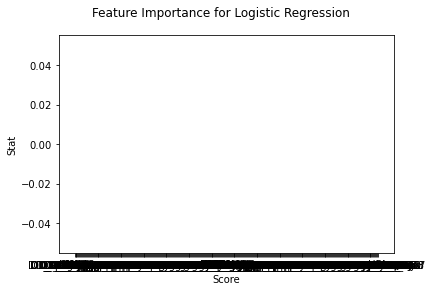

In [275]:
# get importance
importance = abs(model_LR.coef_[0])

# visualize feature importance
plt.bar(height=importance, x=features.columns)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()

